In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import oommfc as oc
from mcpy.system import MCDriver

In [2]:
region = df.Region(p1=(-50e-9, -50e-9, -10e-9), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(2.5e-9, 2.5e-9, 2.5e-9))

system = mm.System(name='skyrmion')

system.energy = (mm.Exchange(A=1.6e-11)
               + mm.DMI(D=4e-3, crystalclass='Cnv_z')
               + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1))
               + mm.Demag()
               + mm.Zeeman(H=(0, 0, 2e5)))

Ms = 1.1e6

def Ms_fun(pos):
    """Function to set magnitude of magnetisation: zero outside cylindric shape,
    Ms inside cylinder.

    Cylinder radius is 50nm.

    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 50e-9:
        return Ms
    else:
        return 0

def m_init(pos):
    """Function to set initial magnetisation direction:
    -z inside cylinder (r=10nm),
    +z outside cylinder.
    y-component to break symmetry.

    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)


# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms)
system.energy

Exchange(A=1.6e-11) + DMI(D=0.004, crystalclass='Cnv_z') + UniaxialAnisotropy(K=510000.0, u=(0, 0, 1)) + Demag() + Zeeman(H=(0, 0, 200000.0))

c:\Users\M Gulam Nabi\anaconda3\envs\irp\lib\site-packages\matplotlib\quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
c:\Users\M Gulam Nabi\anaconda3\envs\irp\lib\site-packages\matplotlib\quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


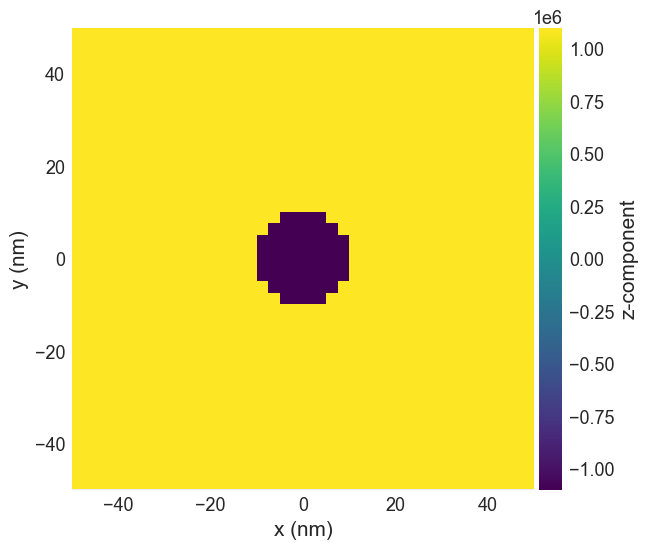

In [3]:
system.m.plane('z').mpl()

In [10]:
mc = MCDriver(system, energy_calc='delta_energy2') 

zeeman.H found.
exchange.A found.
dmi.crystalclass found.
Anisotropy found.
demag.N not found.


In [11]:
mc.drive(N=50000)

Step: 0, Temperature: 0.0K, Field: 200000.0 A/m


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at c:\Users\M Gulam Nabi\Documents\Courses\Independent Research\mcpy\driver.py (98)[0m
[1m
File "mcpy\driver.py", line 98:[0m
[1mdef driver_numpy(N, grid, zeeman_H, temperature):
    <source elided>

[1m@njit(fastmath=True)
[0m[1m^[0m[0m 

This error may have been caused by the following argument(s):
- argument 2: [1mCannot determine Numba type of <class 'function'>[0m


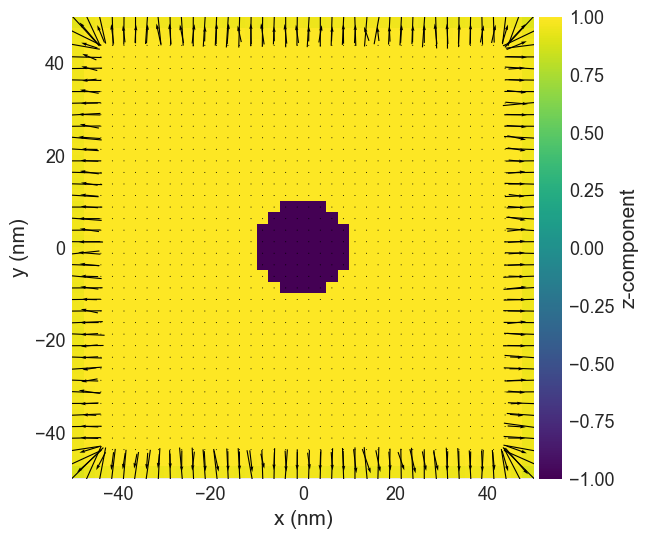

In [12]:
mc.grid.plot(direction='z');

In [7]:
mc = MCDriver(system, energy_calc='numba')

zeeman.H found.
exchange.A found.
dmi.crystalclass found.
Anisotropy found.
demag.N not found.


In [8]:
mc.drive()

Step: 0, Temperature: 0.0K, Field: 200000.0 A/m


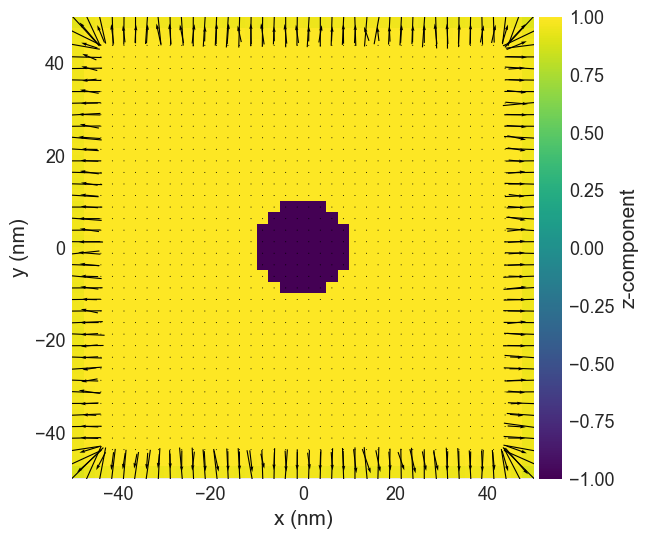

In [9]:
system.m.plane('z').mpl()